# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": -65.11,
        "lat": -43.3
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 59,
        "pressure": 997,
        "humidity": 38,
        "temp_min": 59,
        "temp_max": 59
    },
    "visibility": 10000,
    "wind": {
        "speed": 17.22,
        "deg": 360,
        "gust": 33.33
    },
    "clouds": {
        "all": 0
    },
    "dt": 1566953714,
    "sys": {
        "type": 1,
        "id": 8273,
        "message": 0.0069,
        "country": "AR",
        "sunrise": 1566903373,
        "sunset": 1566942498
    },
    "timezone": -10800,
    "id": 3839307,
    "name": "Rawson",
    "cod": 200
}


In [4]:
print(requests.get(query_url + city))

<Response [200]>


In [18]:
# Set Up Lists to Hold Reponse Info
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

processing_record = 1


print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
City not found. Skipping...
Processing Record 1 | Myitkyina
Processing Record 2 | Port Hardy
Processing Record 3 | Kaeo
Processing Record 4 | Shieli
Processing Record 5 | Mar del Plata
Processing Record 6 | Rocha
Processing Record 7 | Kruisfontein
Processing Record 8 | Lebu
Processing Record 9 | Cape Town
Processing Record 10 | Qaanaaq
Processing Record 11 | Baykit
Processing Record 12 | La Ronge
Processing Record 13 | Porto Novo
Processing Record 14 | Vaini
Processing Record 15 | Ushuaia
Processing Record 16 | Rikitea
Processing Record 17 | Butaritari
Processing Record 18 | Pointe Michel
Processing Record 19 | Hamilton
City not found. Skipping...
Processing Record 20 | Jamestown
City not found. Skipping...
Processing Record 21 | Esperance
Processing Record 22 | Saint George
Processing Record 23 | Kapaa
Processing Record 24 | Hilo
Processing Record 25 | Bomet
Processing Record 26 | Busselton
Processing Record 27 | New Norfolk
Pro

Processing Record 232 | Batagay-Alyta
Processing Record 233 | Villa Maria
Processing Record 234 | Vaitape
City not found. Skipping...
Processing Record 235 | Cody
Processing Record 236 | Balkhash
Processing Record 237 | Axim
Processing Record 238 | Rakitnoye
Processing Record 239 | Lavrentiya
Processing Record 240 | Pangnirtung
Processing Record 241 | Cabo San Lucas
Processing Record 242 | Aksha
Processing Record 243 | Taoudenni
Processing Record 244 | Coruripe
Processing Record 245 | Itaituba
Processing Record 246 | Lokosovo
Processing Record 247 | Niksic
Processing Record 248 | Kahului
Processing Record 249 | Imeni Poliny Osipenko
Processing Record 250 | Atherton
Processing Record 251 | Lunenburg
Processing Record 252 | Mecca
Processing Record 253 | Longyearbyen
Processing Record 254 | Emba
Processing Record 255 | Kibala
Processing Record 256 | Omsukchan
City not found. Skipping...
Processing Record 257 | Muyezerskiy
Processing Record 258 | Gushikawa
Processing Record 259 | Mount Isa

City not found. Skipping...
Processing Record 461 | Ambulu
Processing Record 462 | Narsaq
Processing Record 463 | Nipawin
Processing Record 464 | Yining
Processing Record 465 | Lorengau
Processing Record 466 | Sindor
Processing Record 467 | Mayo
Processing Record 468 | Sanmenxia
City not found. Skipping...
City not found. Skipping...
Processing Record 469 | Sangar
Processing Record 470 | Bira
City not found. Skipping...
Processing Record 471 | Taitung
Processing Record 472 | Norsup
Processing Record 473 | Tabuk
Processing Record 474 | Ko Samui
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 475 | Riyadh
Processing Record 476 | Tubuala
Processing Record 477 | Zhigansk
Processing Record 478 | Plettenberg Bay
Processing Record 479 | Tautira
Processing Record 480 | Souillac
Processing Record 481 | Berlevag
Processing Record 482 | Anlu
Processing Record 483 | Khandyga
Processing Record 484 | Sijunjung
Processing Record 485 | Ewa Beach
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City               551
Country            551
Date               551
Latitude           551
Longitude          551
Max Temperature    551
Humidity           551
Cloudiness         551
Wind Speed         551
dtype: int64

In [13]:
# Display DataFrame
weather_data.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Myitkyina,MM,1566953715,25.38,97.40,74.39,99,78,1.66
1,Port Hardy,CA,1566953715,50.70,-127.42,68.00,77,75,8.05
2,Kaeo,NZ,1566953715,-35.10,173.78,59.00,61,3,1.01
3,Shieli,KZ,1566953716,44.18,66.74,66.65,29,7,7.23
4,Mar del Plata,AR,1566953716,-46.43,-67.52,47.39,65,93,23.20


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

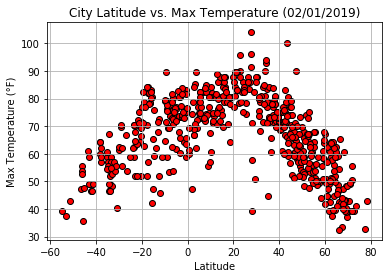

In [14]:
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], facecolors="red", marker="o", edgecolor="black")

plt.title("City Latitude vs. Max Temperature (02/01/2019)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show Plot
plt.show()

#### Latitude vs. Humidity Plot

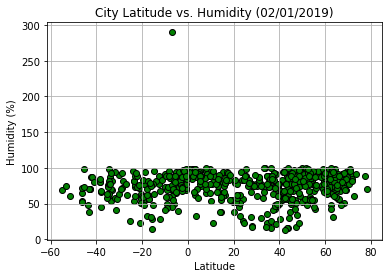

In [15]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors="green", marker="o", edgecolor="black")
# Incorporate Other Graph Properties
plt.title("City Latitude vs. Humidity (02/01/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show Plot
plt.show()

#### Latitude vs. Cloudiness Plot

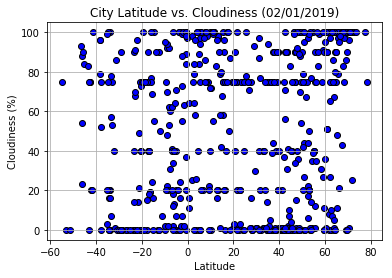

In [16]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolors="blue", marker="o", edgecolor="black")

plt.title("City Latitude vs. Cloudiness (02/01/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show Plot
plt.show()

#### Latitude vs. Wind Speed Plot

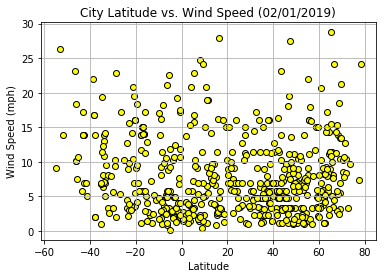

In [17]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolors="yellow", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Wind Speed (02/01/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure


# Show Plot
plt.show()

In [20]:
#•	Based on my analysis of Weatherpy using the OpenWeatherMap API, I found that the data illustrated maximum moderate temperature.
#•	I do not see a significant correlation between humidity and latitude. 
#•	In the city of Mar del Plata, when the latitude drops to negative wind speed increases. I do not know what the correlations is. 
